<a href="https://colab.research.google.com/github/salim4n/kaggle_competition/blob/main/Wasted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet : Classification d'objet recyclable ou non

In [10]:
import tensorflow as tf

In [15]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [16]:
fichier_archive = '/gdrive/MyDrive/dataset/archive.zip'

In [17]:
!unzip '/gdrive/MyDrive/dataset/archive.zip'

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATAS

In [18]:
data_dir = 'DATASET'

In [19]:
import os

In [20]:
train_dir = os.path.join(data_dir, 'TRAIN')
test_dir = os.path.join(data_dir, 'TEST')

In [21]:
os.listdir(train_dir)

['O', 'R']

In [22]:
train_r_dir = os.path.join(train_dir, 'R')
train_o_dir = os.path.join(train_dir, 'O')

In [23]:
len(os.listdir(train_r_dir))

9999

In [24]:
len(os.listdir(train_o_dir))

12565

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [26]:
r_index = 568
o_index = 1596

In [27]:
recyclable_imgs =[os.path.join(train_r_dir, filename) for filename in os.listdir(train_r_dir)]
organic_imgs =[os.path.join(train_o_dir, filename) for filename in os.listdir(train_o_dir)]

In [28]:
len(organic_imgs)

12565

In [29]:
len(recyclable_imgs)

9999

In [30]:
img_r = mpimg.imread(recyclable_imgs[r_index])
img_o = mpimg.imread(organic_imgs[o_index])

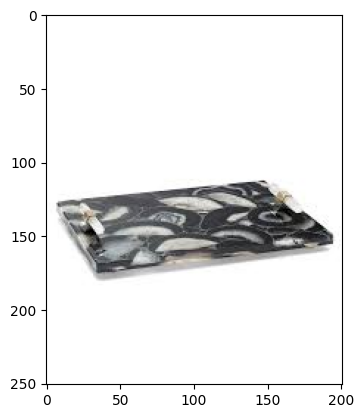

In [31]:
plt.imshow(img_r)

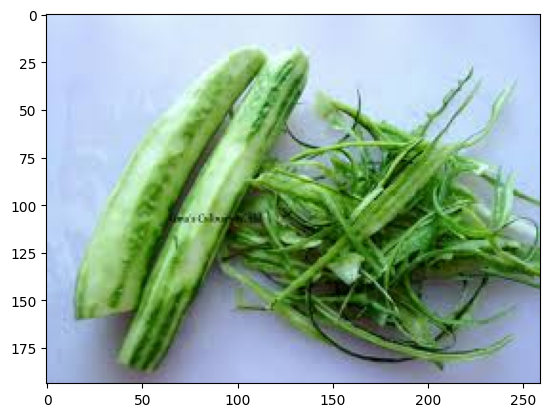

In [32]:
plt.imshow(img_o)

## ImageDataGenerator

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [34]:
train_data_generator = ImageDataGenerator(rescale=1/255.0)
test_data_generator = ImageDataGenerator(rescale=1/255.0)

In [35]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    directory = test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [36]:
batch_images, batch_labels = next(iter(train_generator))

In [37]:
batch_images.shape

(32, 224, 224, 3)

In [38]:
batch_labels.shape

(32,)

In [39]:
batch_labels

array([0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.],
      dtype=float32)

In [40]:
train_generator.class_indices

{'O': 0, 'R': 1}

## Modeling

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [ ]:
model = Sequential([

    #Extraction de caractéristiques
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation='relu', input_shape=(224, 224,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    # applatir
    tf.keras.layers.Flatten(),

    # Dense
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=1, activation="sigmoid"),
                ])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 53, 53, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 128)      0

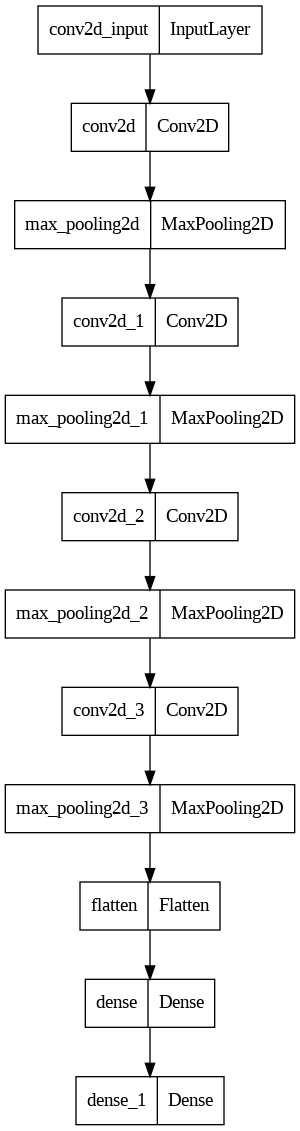

In [ ]:
tf.keras.utils.plot_model(model)

In [42]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
h = model.fit(train_generator,
              epochs=50,
              validation_data=test_generator,
              callbacks=[model_ckp, stop]
              )

Epoch 1/50
706/706 [==============================] - 48s 65ms/step - loss: 0.3164 - accuracy: 0.8696 - val_loss: 0.2609 - val_accuracy: 0.8973
Epoch 2/50
706/706 [==============================] - 49s 70ms/step - loss: 0.3063 - accuracy: 0.8734 - val_loss: 0.2983 - val_accuracy: 0.8794
Epoch 3/50
706/706 [==============================] - 47s 67ms/step - loss: 0.2926 - accuracy: 0.8798 - val_loss: 0.3475 - val_accuracy: 0.8631
Epoch 4/50
706/706 [==============================] - 46s 65ms/step - loss: 0.2801 - accuracy: 0.8862 - val_loss: 0.2636 - val_accuracy: 0.8981
Epoch 5/50
706/706 [==============================] - 48s 67ms/step - loss: 0.2688 - accuracy: 0.8909 - val_loss: 0.2477 - val_accuracy: 0.9105
Epoch 6/50
706/706 [==============================] - 48s 67ms/step - loss: 0.2565 - accuracy: 0.8968 - val_loss: 0.2719 - val_accuracy: 0.8926
Epoch 7/50
706/706 [==============================] - 50s 71ms/step - loss: 0.2413 - accuracy: 0.9041 - val_loss: 0.2653 - val_accuracy:

## Data Augmentation

In [ ]:
# avant augmentation
train_data_generator = ImageDataGenerator(rescale=1/255.0)
test_data_generator = ImageDataGenerator(rescale=1/255.0)

# après augmentation
train_data_generator = ImageDataGenerator(rescale=1/255.0,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode=("nearest"))
test_data_generator = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_generator = train_data_generator.flow_from_directory(
    directory = train_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

test_generator = test_data_generator.flow_from_directory(
    directory = test_dir,
    target_size = (224,224),
    batch_size = 32,
    class_mode='binary'
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


## Extraction de caractéristique


In [1]:
from tensorflow.keras.applications import vgg16

In [2]:
pretrained_model = vgg16.VGG16(include_top=True, weights="imagenet", input_shape=(224,224,3))

553467096/553467096 [==============================] - 15s 0us/step


In [3]:
pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [4]:
pretrained_model = vgg16.VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

58889256/58889256 [==============================] - 2s 0us/step


In [5]:

pretrained_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

## Utilisation des filtres de VGG 16

In [7]:
pretrained_model.trainable = False

In [12]:
flatten_layer = tf.keras.layers.Flatten()

In [13]:
inputs = tf.keras.Input(shape=(224,224,3))
x = pretrained_model(inputs, training=False)
x = flatten_layer(x) #5*5*512
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 3,211,521
Non-trainable params: 14,714,688
_________________________________________________________________


In [43]:
model_ckp = tf.keras.callbacks.ModelCheckpoint(filepath="best_model.h5",
                            monitor="val_accuracy",
                            mode="max",
                            save_best_only=True)
stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5)

In [44]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Ce modèle ne sera pas meilleurs, seulement pour voir les façons différentes de procéder

In [ ]:
#h = model.fit(train_generator, epochs= 50,
#             validation_data=test_generator,
#              callbacks= [model_ckp, stop])

## Fine Tuning

In [46]:
pretrained_model.trainable = True

In [47]:
pretrained_model.layers[:-4]

In [48]:
for layer in pretrained_model.layers:
  layer.trainable = False

In [49]:
inputs = tf.keras.Input(shape=(224,224,3))
x = pretrained_model(inputs, training=False)
x = flatten_layer(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

In [50]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Très mauvais résultat

In [ ]:
#h = model.fit(train_generator, epochs= 50,
#             validation_data=test_generator,
#              callbacks= [model_ckp, stop])